## Neural network Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
cancer = load_breast_cancer()
data = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data['target'] = cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
data.shape

(569, 31)

#### Without Normalization / Regularization

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential([
    Dense(100, input_shape=(30,), activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 50ms/step - loss: 24.1203 - accuracy: 0.5659 - val_loss: 8.8370 - val_accuracy: 0.3516
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 9.5968 - accuracy: 0.3791 - val_loss: 6.2787 - val_accuracy: 0.3516
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 3.2898 - accuracy: 0.5440 - val_loss: 4.1877 - val_accuracy: 0.6923
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 4.1221 - accuracy: 0.7170 - val_loss: 0.5295 - val_accuracy: 0.8242
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.7207 - accuracy: 0.5797 - val_loss: 2.5869 - val_accuracy: 0.3846
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 1.4715 - accuracy: 0.6374 - val_loss: 0.8820 - val_accuracy: 0.8791
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 1.4836 - accuracy: 0.8407 - val_loss: 0.7741 - val_accuracy: 0.8791
Epoch 8/100
4/4 [========

In [10]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.2456 - accuracy: 0.9035


[0.24561533331871033, 0.9035087823867798]

In [12]:
# Visualization
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

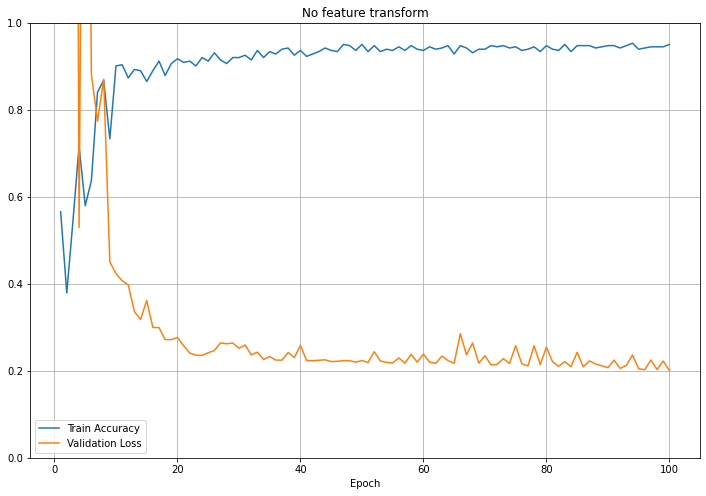

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, label='Train Accuracy')
plt.plot(xs, y_vloss, label='Validation Loss')
plt.legend(), plt.grid()
plt.ylim([0, 1])
plt.xlabel('Epoch')
plt.title('No feature transform')
plt.show()

#### With Normalization / Regularization

In [15]:
from sklearn.preprocessing import StandardScaler
cancer_std = StandardScaler().fit_transform(cancer.data)

In [16]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2022
)

In [17]:
model_2 = Sequential()
model_2.add(Dense(100, input_dim=30, activation='relu'))
model_2.add(Dense(24, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               3100      
                                                                 
 dense_4 (Dense)             (None, 24)                2424      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 5,549
Trainable params: 5,549
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history_2 = model_2.fit(X_train_2, y_train_2, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
4/4 [==============================] - 1s 42ms/step - loss: 0.6484 - accuracy: 0.5989 - val_loss: 0.5261 - val_accuracy: 0.8242
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4808 - accuracy: 0.8571 - val_loss: 0.4029 - val_accuracy: 0.9121
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.3718 - accuracy: 0.9011 - val_loss: 0.3193 - val_accuracy: 0.9231
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2946 - accuracy: 0.9368 - val_loss: 0.2639 - val_accuracy: 0.9231
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2445 - accuracy: 0.9396 - val_loss: 0.2253 - val_accuracy: 0.9121
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2063 - accuracy: 0.9396 - val_loss: 0.1979 - val_accuracy: 0.9231
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.1794 - accuracy: 0.9478 - val_loss: 0.1771 - val_accuracy: 0.9231
Epoch 8/100
4/4 [========

In [20]:
model_2.evaluate(X_test_2, y_test_2)

4/4 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9825


[0.06492889672517776, 0.9824561476707458]

In [21]:
y_acc_2 = history_2.history['accuracy']
y_vloss_2 = history_2.history['val_loss']
xs = np.arange(1, len(y_acc_2)+1)

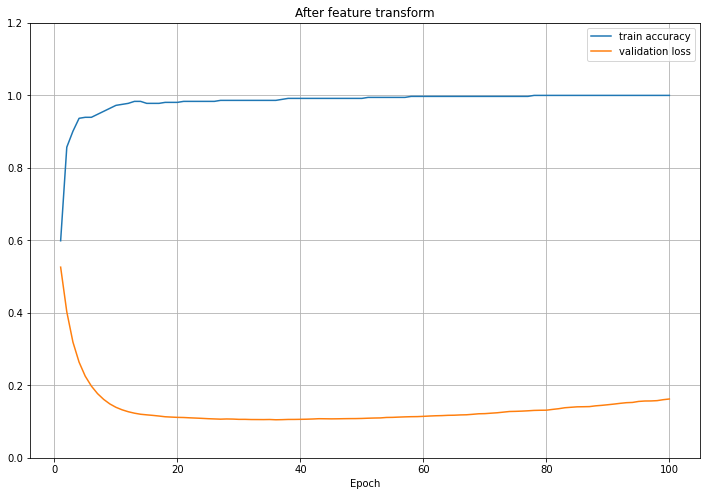

In [22]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc_2, label='train accuracy')
plt.plot(xs, y_vloss_2, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.title('After feature transform')
plt.show()